In [2]:
!pip install gensim

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim
from gensim.parsing import strip_multiple_whitespaces,strip_non_alphanum,strip_numeric,strip_punctuation,strip_short,strip_tags
from gensim.parsing import preprocess_string,remove_stopwords
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("E:\\sentimental analysis\\1429_1.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
null=(data.isnull().sum()/len(data))*100
null

id                        0.000000
name                     19.503751
asins                     0.005770
brand                     0.000000
categories                0.000000
keys                      0.000000
manufacturer              0.000000
reviews.date              0.112522
reviews.dateAdded        30.643393
reviews.dateSeen          0.000000
reviews.didPurchase      99.997115
reviews.doRecommend       1.713791
reviews.id               99.997115
reviews.numHelpful        1.526255
reviews.rating            0.095211
reviews.sourceURLs        0.000000
reviews.text              0.002885
reviews.title             0.014426
reviews.userCity        100.000000
reviews.userProvince    100.000000
reviews.username          0.005770
dtype: float64

### As we can we see features like reviews.didPurchase,reviews.id,reviews.userCity,reviews.userProvince has got complete null values each of their record so we drop them off from data

In [7]:
data.drop(columns=['reviews.didPurchase','reviews.id','reviews.userCity','reviews.userProvince'],axis=1,inplace=True)

In [8]:
null1=(data.isnull().sum()/len(data))*100
null1

id                      0.000000
name                   19.503751
asins                   0.005770
brand                   0.000000
categories              0.000000
keys                    0.000000
manufacturer            0.000000
reviews.date            0.112522
reviews.dateAdded      30.643393
reviews.dateSeen        0.000000
reviews.doRecommend     1.713791
reviews.numHelpful      1.526255
reviews.rating          0.095211
reviews.sourceURLs      0.000000
reviews.text            0.002885
reviews.title           0.014426
reviews.username        0.005770
dtype: float64

In [9]:
data.duplicated().sum()

0

# No duplicate records in our datasets

In [10]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [11]:
num_rating_mfr=data.groupby('manufacturer').count()['reviews.rating']
num_rating_mfr

manufacturer
Amazon                          34606
Amazon Digital Services, Inc       21
Name: reviews.rating, dtype: int64

In [12]:
data['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

In [13]:
df=data[['reviews.rating','reviews.text','reviews.title','reviews.username']]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviews.rating    34627 non-null  float64
 1   reviews.text      34659 non-null  object 
 2   reviews.title     34655 non-null  object 
 3   reviews.username  34658 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [15]:
df_null=df[df['reviews.rating'].isnull()]
df_null

,reviews.rating,reviews.text,reviews.title,reviews.username
2886,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley
2887,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2888,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich
2889,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2890,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton
2891,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley
2892,NaN,UPDATE NOVEMBER 2011:br /br /My review is now ...,Kindle vs. Nook (updated),Ron Cronovich
2893,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton
2894,NaN,I use to hate to read but now that I have my K...,Great,D. Tatro
2895,NaN,All of them quit working. There's absolutely n...,I've had 3!,M. Lansford Kindle fave


In [16]:
df_nn=df[df['reviews.rating'].notnull()]
df_nn

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42
...,...,...,...,...
34655,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris
34656,1.0,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart
34657,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson
34658,1.0,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer


In [17]:
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34627 entries, 0 to 34659
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviews.rating    34627 non-null  float64
 1   reviews.text      34626 non-null  object 
 2   reviews.title     34622 non-null  object 
 3   reviews.username  34625 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [18]:
df_nn=df_nn.dropna()

In [19]:
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34620 entries, 0 to 34659
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviews.rating    34620 non-null  float64
 1   reviews.text      34620 non-null  object 
 2   reviews.title     34620 non-null  object 
 3   reviews.username  34620 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [20]:
df_nn.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [21]:
df_nn["senti"] = df_nn["reviews.rating"]>=4
df_nn["senti"]

0         True
1         True
2         True
3         True
4         True
         ...  
34655    False
34656    False
34657    False
34658    False
34659    False
Name: senti, Length: 34620, dtype: bool

In [22]:
df_nn["senti"] = df_nn["reviews.rating"]>=4
df_nn["senti"] = df_nn["senti"].replace([True , False] , ["pos" , "neg"])

In [23]:
df_nn.head()

,reviews.rating,reviews.text,reviews.title,reviews.username,senti
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,pos
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,pos
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,pos
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,pos
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,pos


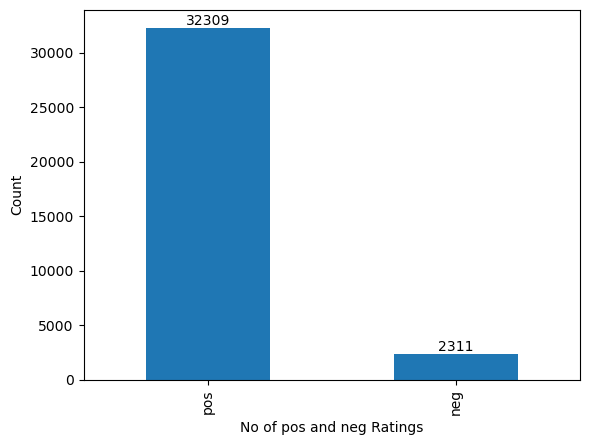

In [24]:
df_nn["senti"].value_counts().plot.bar()
plt.xlabel("No of pos and neg Ratings")
plt.ylabel('Count')

for i in range(len(df_nn["senti"].value_counts())):
    count=df_nn["senti"].value_counts()[i]
    plt.text(i,count,str(count), ha='center', va='bottom')

# Text Preprocessing

In [25]:
df_nn.rename(columns={'reviews.text':'text'},inplace=True)

In [26]:
text='This product789 so@#$$ far has not disappointed. https://www.google.com/search?q=http+links&rlz=1C1CHWL_enIN1034IN1034&oq=http+link&aqs=chrome.0.0i512j69i57j0i512j69i60l3j69i65l2.7142j0j7&sourceid=chrome&ie=UTF-8 My children love to use it and I like the ability to monitor control what content they see with ease.'

In [27]:
t_lower=lambda x: x.lower()
remove_single_char = lambda s: re.sub(r'\s+\w{1}\s+', '', s)

filters=[t_lower,strip_tags,strip_short,strip_multiple_whitespaces,strip_non_alphanum,strip_punctuation,strip_numeric,remove_stopwords,remove_single_char]

In [28]:
from gensim.utils import simple_preprocess

In [29]:
def clean(text,flg_lem=True,flg_stem=False):
    
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    preprocess=preprocess_string(text,filters)
    
    if flg_lem==True:
        ls=WordNetLemmatizer()
        lst=[ls.lemmatize(word) for word in preprocess]
    
    if flg_stem==True:
        
        st=PorterStemmer()
        lst==[st.stem(word) for word in preprocess]
    
    text = " ".join(lst)
    
    return text

In [30]:
df_nn['c_text']=df_nn['text'].apply(clean)

In [31]:
# Countvectorizer

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x=df_nn.c_text
y=df_nn.senti

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [35]:
cnt=CountVectorizer()
X_train=cnt.fit_transform(x_train)
X_test=cnt.transform(x_test)

In [36]:
df_cnt=pd.DataFrame(X_train.toarray(),columns=cnt.get_feature_names_out())

In [37]:
df_cnt

,aaa,aamazon,aand,abandon,abandoning,abc,abcmouse,abcnumbers,abcsatisfied,abd,...,zipper,zippy,zombiesterrific,zone,zoo,zoom,zoomcopy,zoomed,zooming,zwave
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
tfd=TfidfVectorizer()
X_train1=tfd.fit_transform(x_train)
X_test1=cnt.transform(x_test)

In [39]:
df_tfd=pd.DataFrame(X_train1.toarray(),columns=tfd.get_feature_names_out())

In [40]:
pd.set_option('display.max_columns', 500)

In [41]:
df_tfd

,aaa,aamazon,aand,abandon,abandoning,abc,abcmouse,abcnumbers,abcsatisfied,abd,ability,abit,abke,able,ablebooks,ableplay,abnormal,abook,abort,aboutjust,abroad,absence,absofbing,absoluitely,absolute,absolutely,absolutelylove,absolutelytv,absolutereader,absolutly,absoutley,abt,abundance,abundant,abuse,abused,abysmal,ac,academic,acc,accedently,accent,accentg,accept,acceptable,acceptableeasy,acceptablereader,acceptably,acceptance,accepted,accepting,accepts,acceries,acces,accesible,accesory,access,accessble,accesschannels,accessed,accessfinelightweight,accessibility,accessible,accessibleeasy,accessing,accessmail,accessmusic,accessoriesconvient,accessory,accessreader,accesswant,accessworrygetting,accident,accidental,accidentally,accidentannoying,accidentlly,accidently,acclimate,accommodate,accommodating,accomodate,accompany,accomplish,accomplished,accomplishes,accomplishing,accomplishment,according,accordingly,accordinglyprice,account,accounting,accountsbelieve,accountsgreat,accountton,accountuse,acct,accumulating,accupied,accuracy,accurate,accuratealexa,accurately,accurrate,accustomed,ace,acer,achat,acheivement,achieve,achieved,acorn,acoustic,acquainted,acquire,acrobat,act,acting,action,activate,activated,activatedgood,activating,activation,active,actively,activites,activitiesgreat,activitieswrong,activity,actly,actor,actress,actual,actually,actuallyfar,actuallylike,actuallythink,ad,adapt,adaptable,adaptation,adapter,adapterroom,adapting,adaptive,adaptor,adaptorwork,adapts,adaquate,adb,adbest,add,addcard,added,addedand,addedc,addedworry,addfuture,addict,addicted,addicting,addictionsamazon,addictive,adding,addingskills,addition,additional,additionally,additionalmas,additionalmemory,additionalreader,additionkind,additionportable,additionthrowaway,additive,additon,addon,addons,addp,address,addressed,addsbother,addspay,addstarting,addtion,adequate,adequately,adjacent,adjoining,adjust,adjustable,adjustablegreat,adjustablelightweight,adjustablesignificant,adjusted,adjustedgone,adjusting,adjustment,adjustmentweek,adjusts,adlock,admin,administrator,admit,admitlove,admittedly,adolescent,adopt,adopted,adopter,adoption,adoptor,adorablesurprisingly,adore,adores,adreliable,adroid,adsappear,adsbad,adsbother,adsfrustrating,adskindle,adsknow,adspackagerecall,adsrecommend,adssturdy,adsunderstand,adsway,adt,adult,adulting,adultneed,adultsbeat,adultsoverpriced,aduquate,advance,advanced,advancement,advancing,advantage,advantagegreatest,adventure,adverse,advert,advertbadlock,advertise,advertised,advertisedgreat,...,worriedgoing,worry,worrying,worryvaluebeat,worse,worselimitation,worship,worst,worstneed,worth,worthiness,worthless,worthprice,worthreader,worthwhile,worthy,wotks,woudl,woujld,wouldn,wouldnable,wouldnactually,wouldnallow,wouldnbig,wouldnbother,wouldnbothered,wouldnbright,wouldnbuy,wouldnbuyreader,wouldncarry,wouldnchange,wouldncharge,wouldnchoice,wouldncome,wouldncomewant,wouldnconnect,wouldncrazy,wouldndamaging,wouldndifficult,wouldneasily,wouldnexcellent,wouldnexpect,wouldnfast,wouldnfeel,wouldnfight,wouldnfrankfort,wouldngreat,wouldnheadache,wouldnhesitate,wouldnhold,wouldnincluded,wouldnkindle,wouldnknown,wouldnleave,wouldnlength,wouldnlet,wouldnlike,wouldnload,wouldnloves,wouldnmind,wouldnmonths,wouldnoffer,wouldnorder,wouldnpanic,wouldnpouches,wouldnpurchase,wouldnpurchased,wouldnrd,wouldnrecommend,wouldnrecover,wouldnruin,wouldnson,wouldnspend,wouldnstars,wouldnstop,wouldnstream,wouldnsuddenly,wouldnt,wouldnthink,wouldntrade,wouldnturn,wouldnturns,wouldnunderstand,wouldnunlockenter,wouldnuse,wouldnwant,wouldnwaste,wouldnwilling,wouldnwireless,wouldnwore,wouldnwork,wouldnworry,wouldnworth,wouldve,wouls,wound,wow,wowenjoy,wpuldnt,wrap,wrapped,wrapping,wright,wrinkled,wrist,write,writer,writes,writing,written,wrko,wrong,wrongly,wrongthank,wrote,wroth,wry,wtf,wth,wuestions,wut,wwan,wwe,wwere,www,wy,xams,xan,xbmc,xbmckodigreat,xbox,xda,xfat,xfinity,xiaomi,xl,xlsx,xm,xmas,xmascurrently,xmasknow,xmasloves,xmassmall,xpectations,xray,xtra,xxx,x

Text(0.5, 1.0, 'Sparse Matrix Sample')

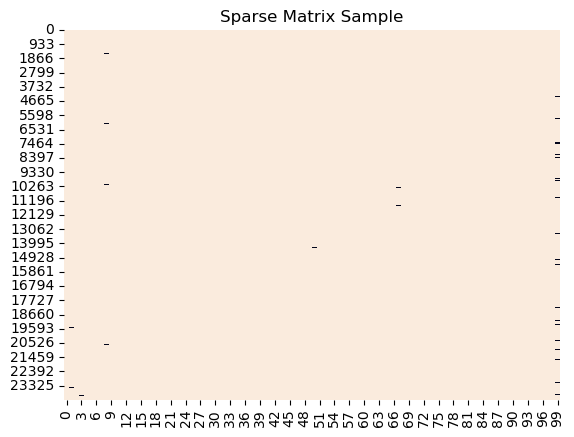

In [42]:
sns.heatmap(X_train1.todense()[:,np.random.randint(0,X_train1.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [43]:
# X_train1.shape[0]-return all rows 
# X_train1.shape[1]-return all columns

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
classifier = MultinomialNB()

In [46]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [47]:
## pipeline
classifier.score(X_train,y_train)

0.9506891144672773

In [48]:
pred=classifier.predict(X_test1)

In [49]:
from sklearn import metrics

In [50]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         neg       0.70      0.16      0.25       703
         pos       0.94      1.00      0.97      9683

    accuracy                           0.94     10386
   macro avg       0.82      0.58      0.61     10386
weighted avg       0.93      0.94      0.92     10386



In [51]:
df_nn['c_text']

0        product far disappointed child love use like a...
1        great beginner experienced person bought gift ...
2        inexpensive tablet use learn step nabi thrille...
3        ve week love tablet great value prime member t...
4        bought grand daughter come visit set user ente...
                               ...                        
34655    appreciably faster higher amp charger kindle k...
34656    amazon include charger kindle fact charging ex...
34657    love kindle disappointed kindle power fast cha...
34658    surprised come type charging cord purchase spr...
34659    spite fact good thing amazon anthing ve gotten...
Name: c_text, Length: 34620, dtype: object

In [52]:
import gensim

In [53]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer

# Ticket Data
corpus = df_nn['c_text'].values

# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

#print(vectorizer.get_feature_names())

# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
CountVectorizedData['Priority']=df_nn['senti']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(34620, 21001)


,aaa,aamazon,aand,abandon,abandoned,abandoning,abc,abcmouse,abcnumbers,abcsatisfied,abd,ability,abilty,abit,abke,able,ablebooks,ableplay,abnormal,abode,abook,abort,abound,abount,aboutjust,abroad,abruptly,absence,absofbing,absoluitely,absolute,absolutely,absolutelylove,absolutelystand,absolutelytv,absolutereader,absolutly,absorbs,absoutley,abt,abundance,abundant,abuse,abused,abysmal,ac,academic,acc,accedently,accelerationhvideostutter,accelerometer,accent,accentg,accept,acceptable,acceptableeasy,acceptablereader,acceptably,acceptance,accepted,accepting,accepts,acceries,acces,accesible,accesory,access,accessability,accessable,accessble,accesschannels,accessed,accessfinelightweight,accessholding,accessibility,accessible,accessibleeasy,accessing,accessmail,accessmusic,accessoriesconvient,accessory,accessreader,accesssurprised,accesswant,accessworrygetting,accident,accidental,accidentally,accidentannoying,accidentlly,accidently,acclimate,accommodate,accommodates,accommodating,accomodate,accompany,accomplish,accomplished,accomplishes,accomplishing,accomplishment,accomplishplenty,according,accordingly,accordinglyprice,account,accountbetter,accountdeal,accountfaster,accounting,accountpain,accountprime,accountsbelieve,accountsgreat,accountthings,accountton,accountuse,acct,accumulate,accumulated,accumulating,accumulative,accupied,accuracy,accurate,accuratealexa,accurately,accurrate,accustomed,ace,acer,acessexpect,achat,acheivement,achieve,achieved,achievement,achieves,achy,acknowledged,acording,acorn,acoustic,acquaintance,acquainted,acquire,acquired,acquiring,acquisition,acrobat,act,acting,action,activate,activated,activatedgood,activating,activation,active,actively,activites,activitieschoice,activitiesgreat,activitieswrong,activity,actly,actor,actress,actual,actually,actuallyfar,actuallyimagine,actuallylike,actuallyoverpricedhappy,actuallyplay,actuallythink,ad,adage,adapt,adaptable,adaptation,adapter,adapterroom,adapting,adaptive,adaptor,adaptorwork,adapts,adaquate,adb,adbest,add,addable,addcard,added,addedand,addedc,addedworry,addfuture,addict,addicted,addicting,addiction,addictionsamazon,addictive,adding,addingskills,addition,additional,additionally,additionalmas,additionalmemory,additionalreader,additioncompared,additionkind,additionportable,additionthrowaway,additive,additon,addon,addons,addp,address,addressed,addsbother,addscharm,addspay,addstarting,addtion,addtoo,addwarranty,adequate,adequately,adfter,adhd,adjacent,adjoining,adjunct,adjust,adjustable,adjustablegreat,adjustablelightweight,adjustablesignificant,adjustablesmall,adjusted,adjustedgone,adjuster,adjusting,...,wouldnlove,wouldnloves,wouldnmind,wouldnmonths,wouldnneed,wouldnnormally,wouldnoffer,wouldnorder,wouldnpack,wouldnpanic,wouldnpay,wouldnplay,wouldnpouches,wouldnpurchase,wouldnpurchased,wouldnrd,wouldnreal,wouldnreceive,wouldnrecommend,wouldnrecover,wouldnregister,wouldnruin,wouldnshare,wouldnsit,wouldnsnuff,wouldnson,wouldnspend,wouldnstars,wouldnstop,wouldnstream,wouldnsuddenly,wouldnsupport,wouldnsure,wouldnt,wouldnthink,wouldntrade,wouldntrouble,wouldnturn,wouldnturns,wouldnunderstand,wouldnunlockenter,wouldnuse,wouldnwant,wouldnwaste,wouldnwilling,wouldnwireless,wouldnwore,wouldnwork,wouldnworry,wouldnworth,wouldve,wouls,wound,wow,wowenjoy,wowgreat,wowwee,wpuldnt,wracking,wrap,wrapped,wrapping,wrath,wreck,wrestling,wright,wrinkled,wrist,write,writer,writes,writing,written,wrk,wrko,wrong,wrongawesome,wrongly,wrongthank,wrote,wroth,wry,wtf,wtg,wth,wuestions,wut,wwan,wwe,wwere,www,wy,xams,xan,xbmc,xbmckodigreat,xbox,xda,xfat,xfinity,xiaomi,xl,xlsx,xm,xmas,xmascurrently,xmasknow,xmasloves,xmassmall,xpectations,xray,xtra,xxx,xyz,ya,yahoo,yamaha,yanked,yankee,yard,yay,yea,yeah,yeahalexa,yeahpowerful,year,yearassignment,yearbest,yearbuy,yearcome,yearcomforting,yeardefinitely,yeareasy,yearelmo,yeargoing,yeargood,yeargreat,yearhard,yearlot,yearly,yearrealize,yearsand,yearsbeginning,yearsbetter,yearsconnected,yearsdifficult,yearsessential,yearsgood,yearshappy,yearsimagi